Import all Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [ ]:
#Import the file
from google.colab import files
upload = files.upload()

Saving processed.cleveland.data to processed.cleveland.data


In [ ]:
#Create a dataframe
import pandas as pd
data = pd.read_csv('processed.cleveland.data', sep=",")
#Print the fist 5 rows of the dataset
data.head()

63.0  1.0  1.0.1  145.0  233.0  1.0.2  2.0  150.0  0.0  2.3  3.0 0.0.1  \
0  67.0  1.0    4.0  160.0  286.0    0.0  2.0  108.0  1.0  1.5  2.0   3.0   
1  67.0  1.0    4.0  120.0  229.0    0.0  2.0  129.0  1.0  2.6  2.0   2.0   
2  37.0  1.0    3.0  130.0  250.0    0.0  0.0  187.0  0.0  3.5  3.0   0.0   
3  41.0  0.0    2.0  130.0  204.0    0.0  2.0  172.0  0.0  1.4  1.0   0.0   
4  56.0  1.0    2.0  120.0  236.0    0.0  0.0  178.0  0.0  0.8  1.0   0.0   

   6.0  0  
0  3.0  2  
1  7.0  1  
2  3.0  0  
3  3.0  0  
4  3.0  0

In [ ]:
#The csv file did not have a header, so assigned a headerlist
headerList = ['age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
data.to_csv("processed.cleveland.data.csv", header=headerList, index=False)
data = pd.read_csv("processed.cleveland.data.csv")
print('\nModified file:')
data.head()


Modified file:


age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
1  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
2  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
3  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
4  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   

   slope   ca thal  target  
0    2.0  3.0  3.0       2  
1    2.0  2.0  7.0       1  
2    3.0  0.0  3.0       0  
3    1.0  0.0  3.0       0  
4    1.0  0.0  3.0       0

In [ ]:
print(data.shape)
data.info()
data.dtypes

(302, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

In [ ]:
#checking for any null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#CHECKING FOR UNIQUE VALUES
for col in data.columns:
  print(col, data[col].unique())

age [67. 37. 41. 56. 62. 57. 63. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
sex [1. 0.]
cp [4. 3. 2. 1.]
trestbps [160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124. 125.
 142. 128. 145. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
chol [286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263. 199.
 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247. 167.
 230. 335. 234. 233. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 56

In [ ]:
spec_chars = ["!",'"',"#","%","&","'","(",")","*","+",",","-",".","/",":",";","<","=",">","?","@","[","\\","]","^","_","`","{","|","}","~","–"]
for char in spec_chars:
  data = data.replace(char,np.nan)
print(data)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
1    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
2    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
3    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
4    56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
298  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
299  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
300  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
301  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  target  
0      2.0  3.0  3.0

<Axes: >

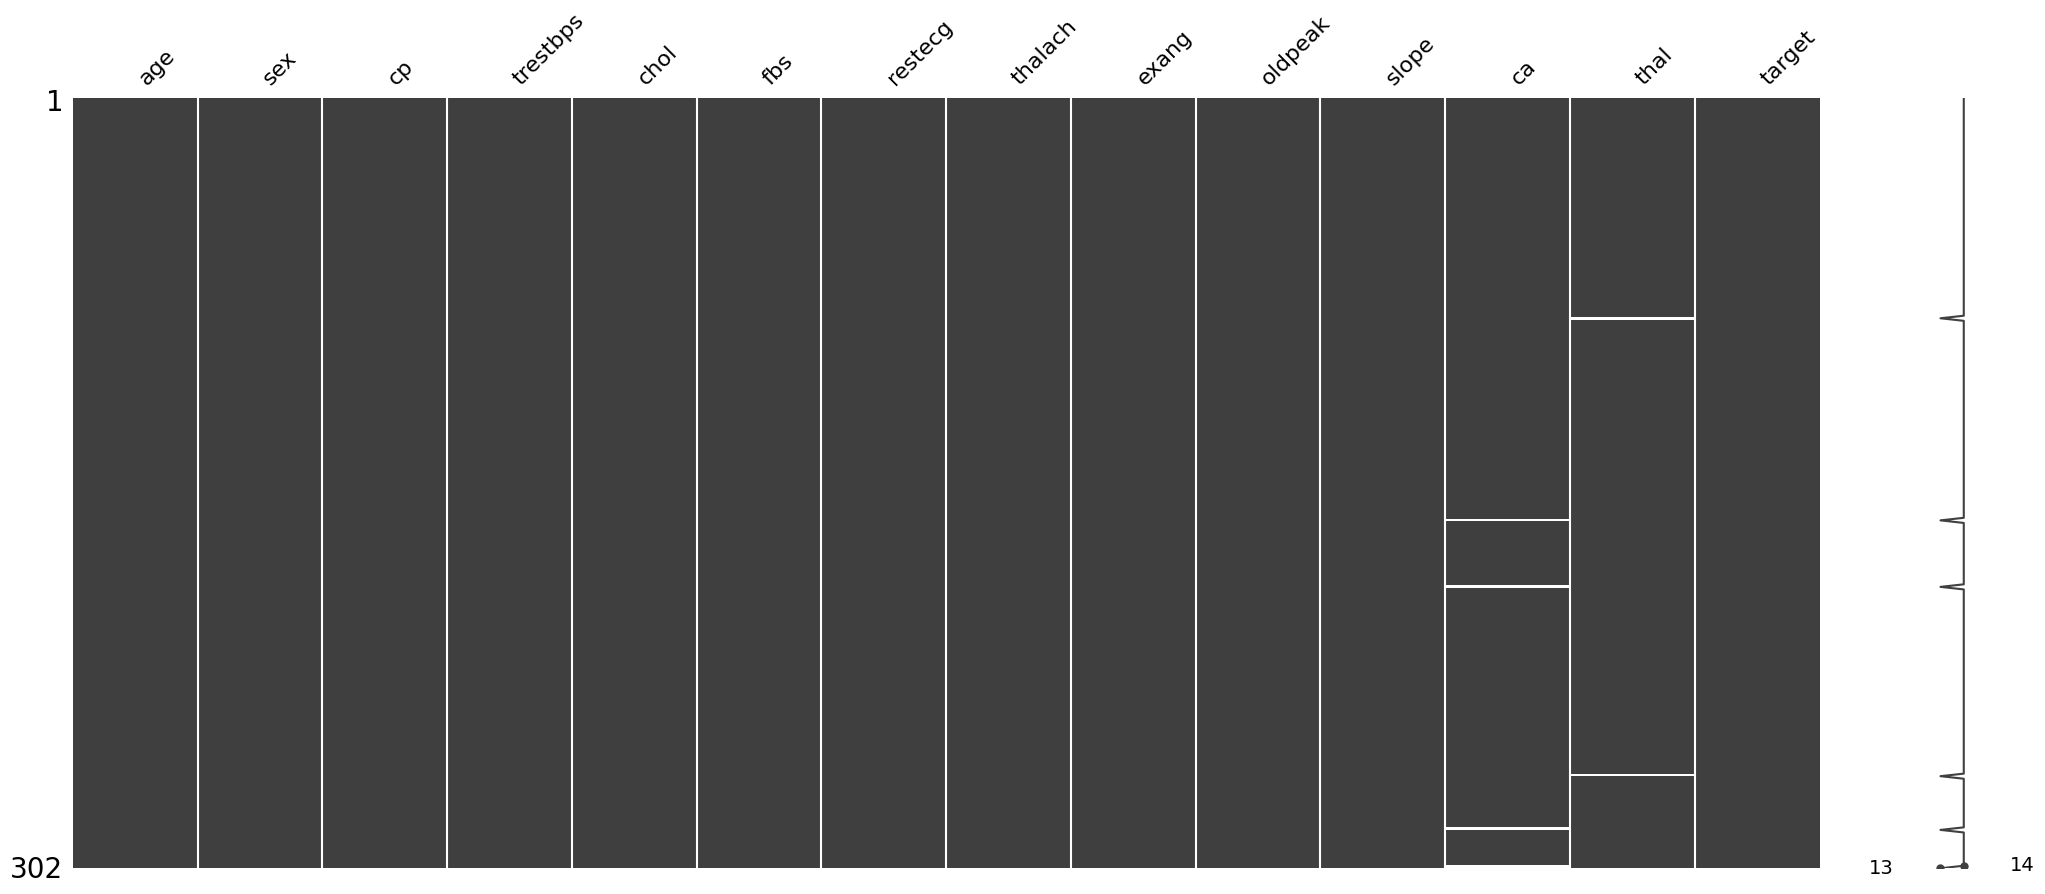

In [ ]:
msno.matrix(data)

In [ ]:
print('DataFrame after dropping the rows having missing values:')
my_data =data.dropna(axis=0)
print(my_data)

DataFrame after dropping the rows having missing values:
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
1    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
2    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
3    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
4    56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
296  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
297  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
298  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
299  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
300  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.

In [ ]:
my_data[['age', 'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','slope']] = my_data[['age', 'sex','cp','trestbps','chol','fbs','restecg','thalach',
'exang','slope']].astype(int)
my_data[['ca', 'thal']] = my_data[['ca', 'thal']].astype(float).astype(int)

<ipython-input-15-519ab25cfe83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data[['age', 'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','slope']] = my_data[['age', 'sex','cp','trestbps','chol','fbs','restecg','thalach',
<ipython-input-15-519ab25cfe83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data[['ca', 'thal']] = my_data[['ca', 'thal']].astype(float).astype(int)


In [ ]:
#checking for any data duplicates
duplicates = my_data.duplicated().sum()
if duplicates:
  print("The Duplidated rows available in the dataset")
else:
  print("There are no duplicates in the dataset")

There are no duplicates in the dataset


In [ ]:
my_data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  296.000000  296.000000  296.000000  296.000000  296.000000  296.000000   
mean    54.513514    0.675676    3.165541  131.648649  247.398649    0.141892   
std      9.051631    0.468915    0.958262   17.775956   52.078915    0.349530   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.250000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  296.000000  296.000000  296.000000  296.000000  296.000000  296.000000   
mean     0.993243  149.597973    0.327703    1.051351    1.597973    0.679054   
std      0.994879   22.980401    0.470171    1.165841    0.613848    0.939726   
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  133.000000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

             thal      target  
count  296.000000  296.000000  
mean     4.726351    0.949324  
std      1.940500    1.235410  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    2.000000  
max      7.000000    4.000000

In [ ]:
#changing 2,3,4 as 1 in target column
# 0: no disease 1 : have disease
my_data.target = my_data.target.replace([2,3,4],1)
my_data['target'].unique()

<ipython-input-18-a33c7785f9ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data.target = my_data.target.replace([2,3,4],1)


array([1, 0])

Text(0.5, 1.0, 'CORRELATION BETWEEN VARIABLES')

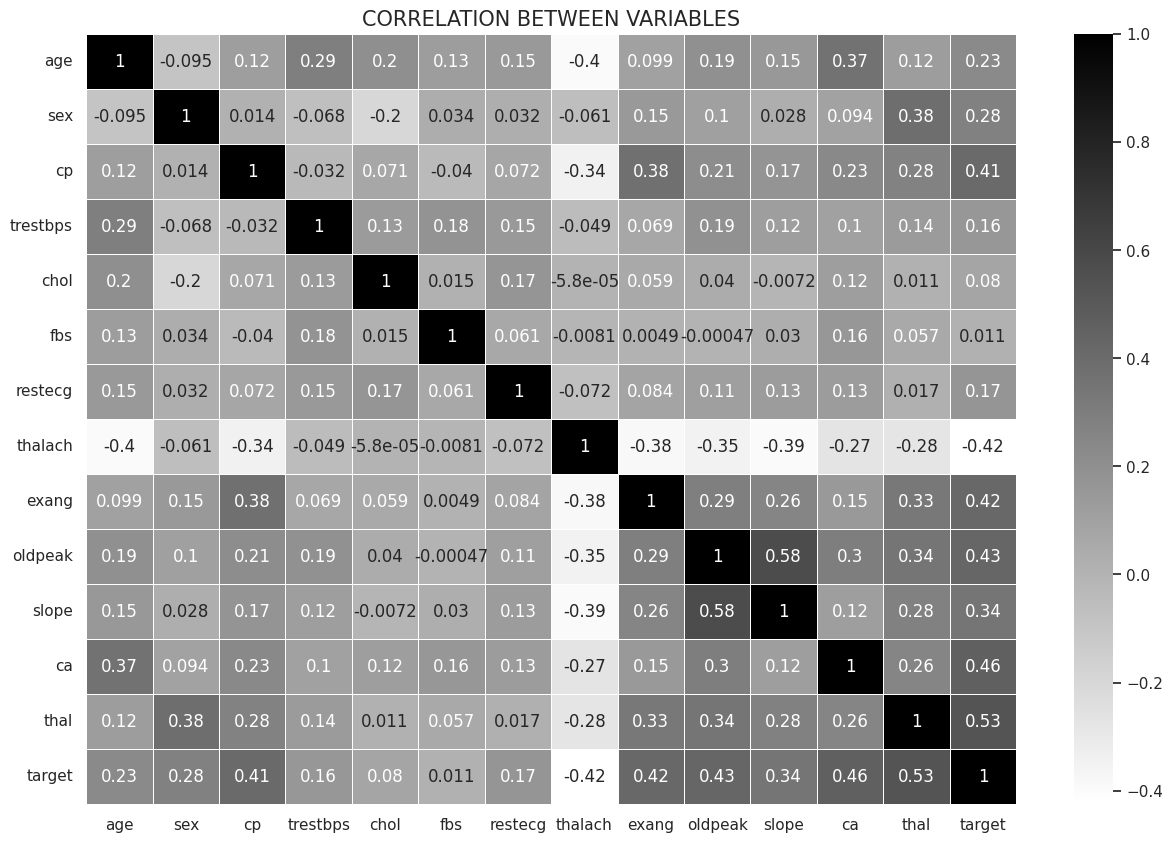

In [ ]:
my_data.corr()
sns.set(style="white")
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(my_data.corr(), annot = True, linewidths=.5, cmap="gist_gray_r")
plt.title('CORRELATION BETWEEN VARIABLES', fontsize = 15)

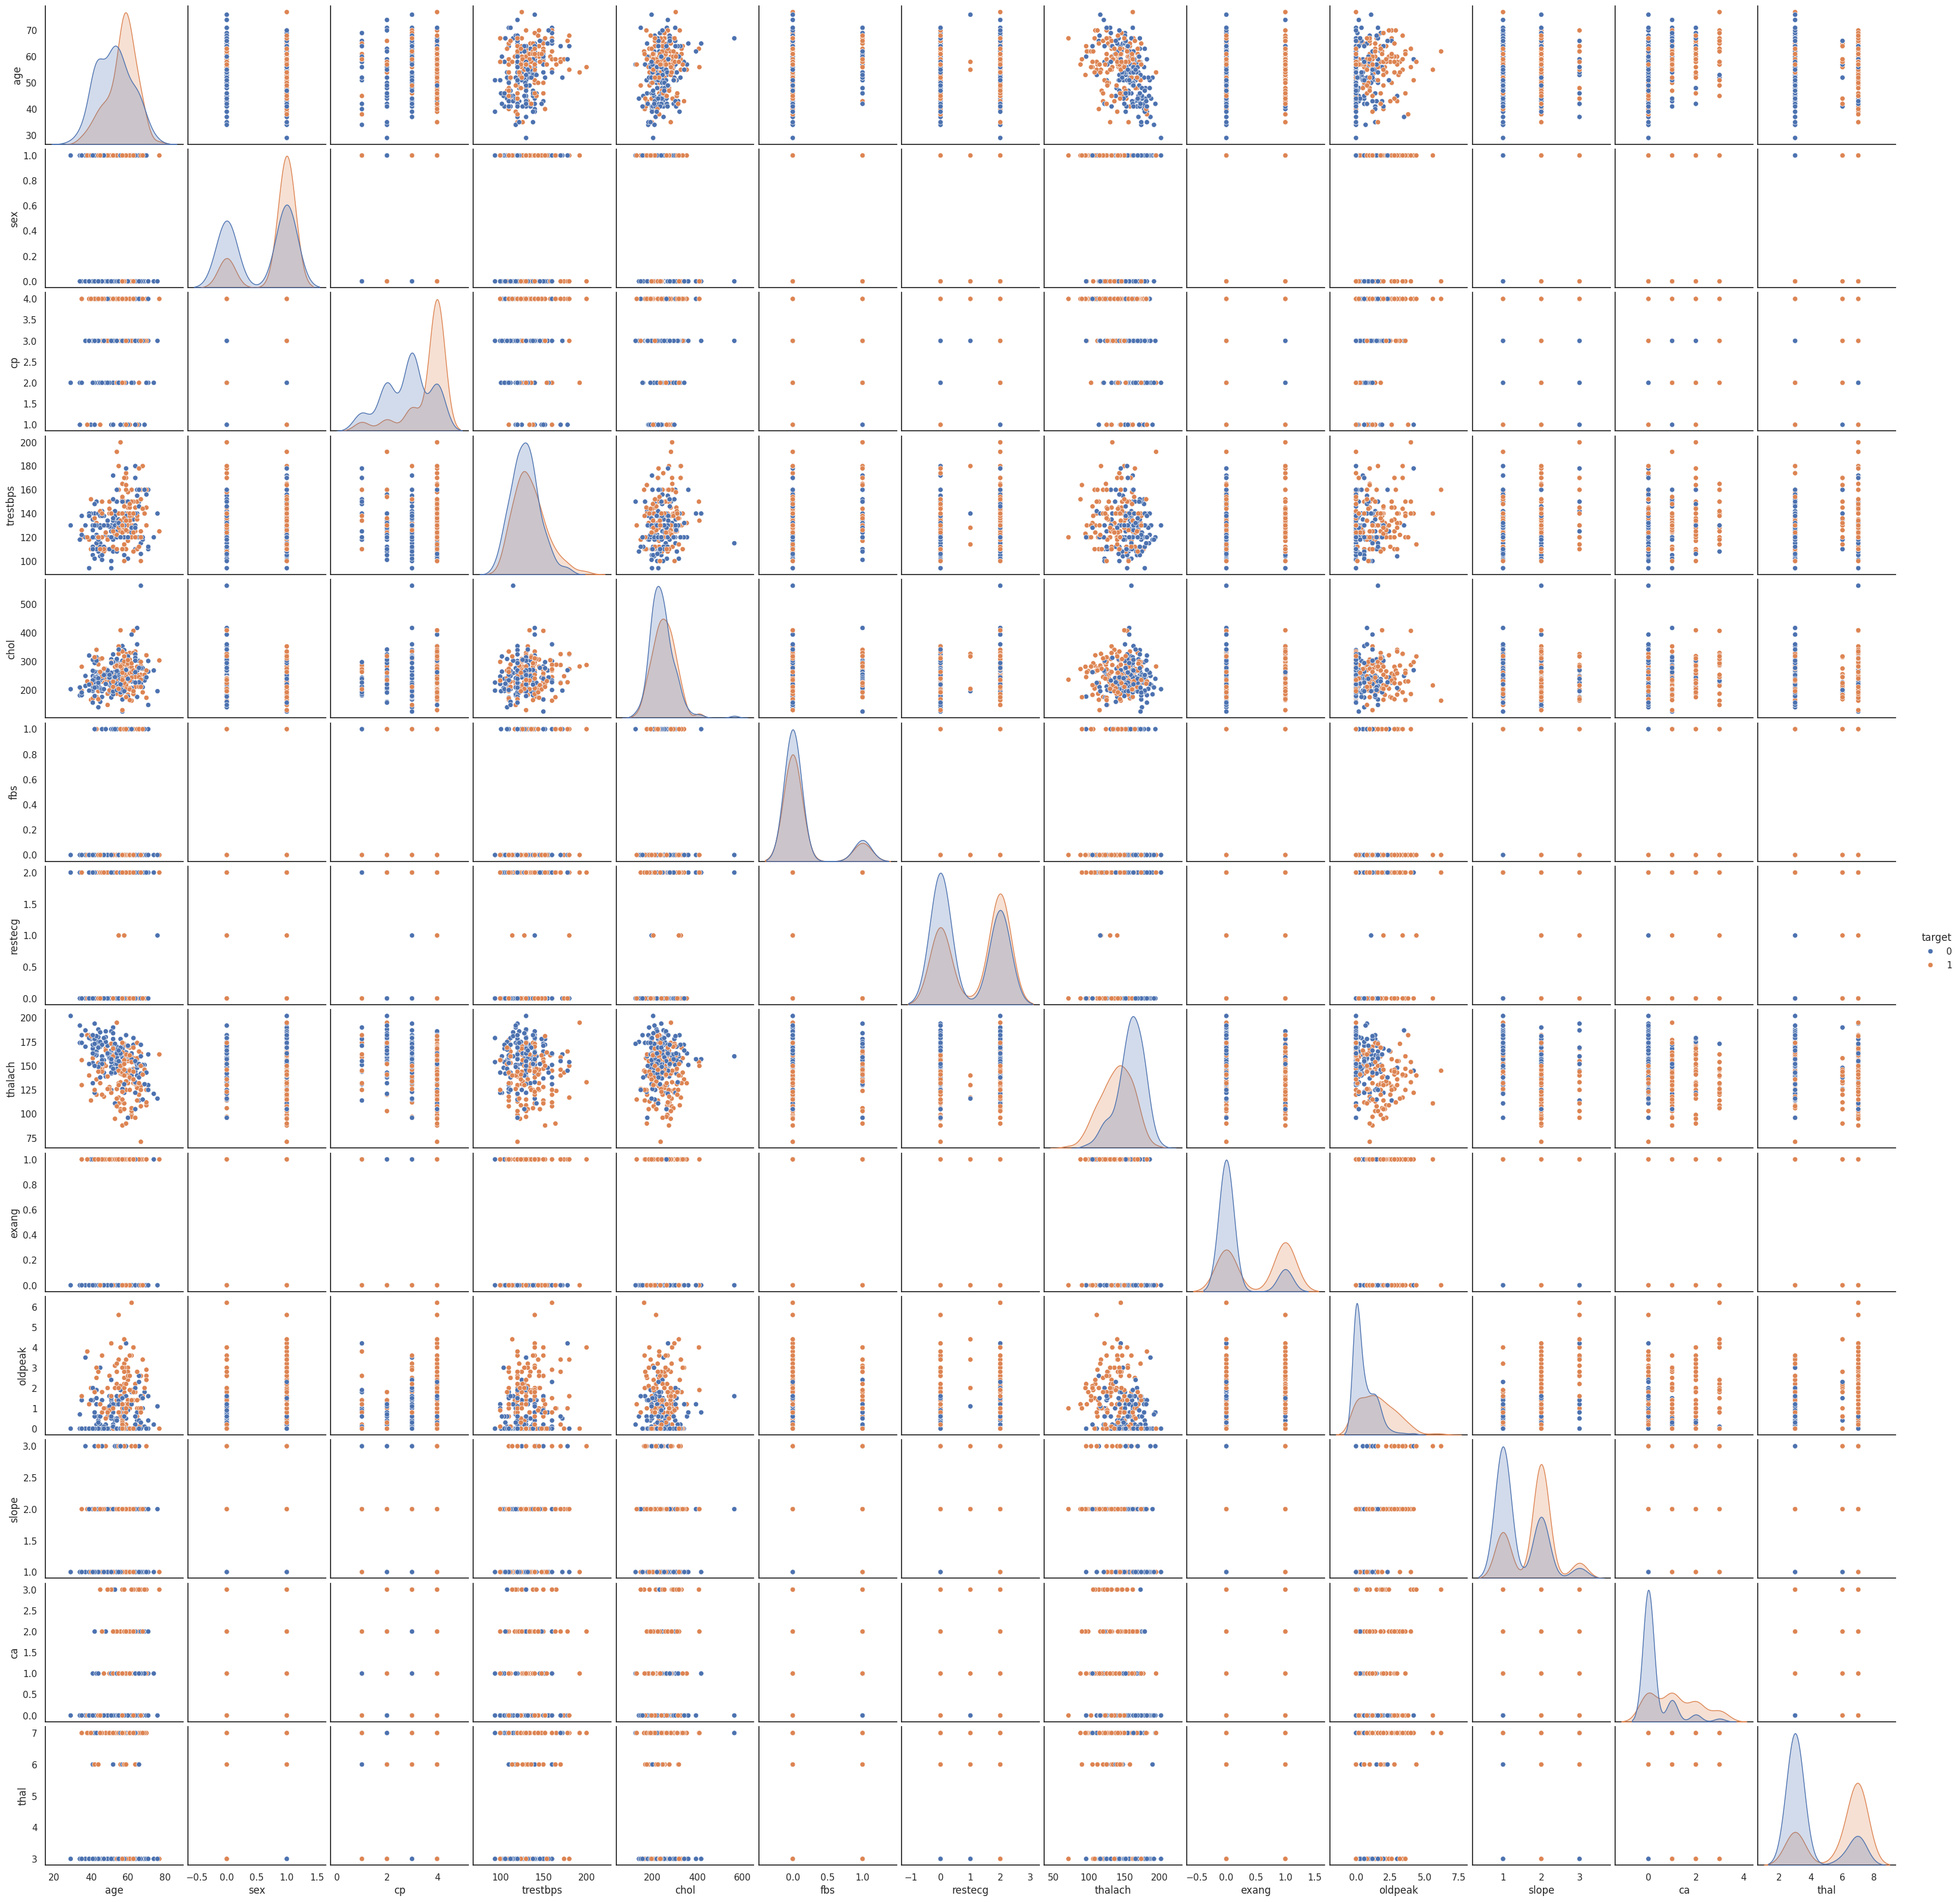

In [ ]:
sns.pairplot(my_data, hue ='target')

In [ ]:
#FOR BETTER VISUALIZATION
my_data['sex'] = my_data.sex.replace({1: "Male", 0: "Female"})
my_data['cp'] = my_data.cp.replace({1: "typical_angina", 2: "atypical_angina", 3:"non-angina pain", 4: "asymtomatic"})
my_data['fbs'] = my_data.fbs.replace({1: "True", 0: "False"})
my_data['restecg'] = my_data.restecg.replace({0: "normal", 1: "ST-T wave", 2:"Left ventricular hypertrophy"})
my_data['exang'] = my_data.exang.replace({1: "Yes", 0: "No"})
my_data['slope'] = my_data.slope.replace({1: "upsloping", 2: "flat", 3:"downsloping"})
my_data['thal'] = my_data.thal.replace({6: "fixed_defect", 7: "reversable_defect", 3:"normal"})
my_data['target'] = my_data.target.replace({1: "Have Disease", 0: "No disease"})

<ipython-input-21-c7529d10e5f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['sex'] = my_data.sex.replace({1: "Male", 0: "Female"})
<ipython-input-21-c7529d10e5f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['cp'] = my_data.cp.replace({1: "typical_angina", 2: "atypical_angina", 3:"non-angina pain", 4: "asymtomatic"})
<ipython-input-21-c7529d10e5f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [ ]:
my_data['target'].value_counts()

target
No disease      159
Have Disease    137
Name: count, dtype: int64

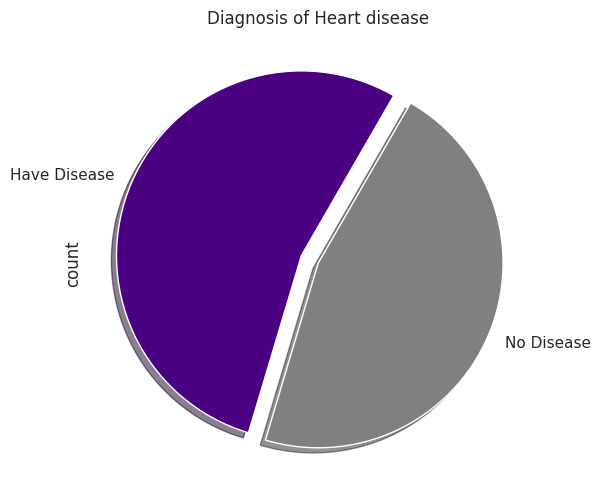

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
y = my_data['target'].value_counts().plot.pie(x= "Heart Disease", y = "No of Patients", labels = ["Have Disease", "No Disease"],startangle = 60, colors = ["indigo","grey"] , ax=ax, explode = [0.1, 0], shadow = True)
ax.set(title = "Diagnosis of Heart disease")
plt.show()

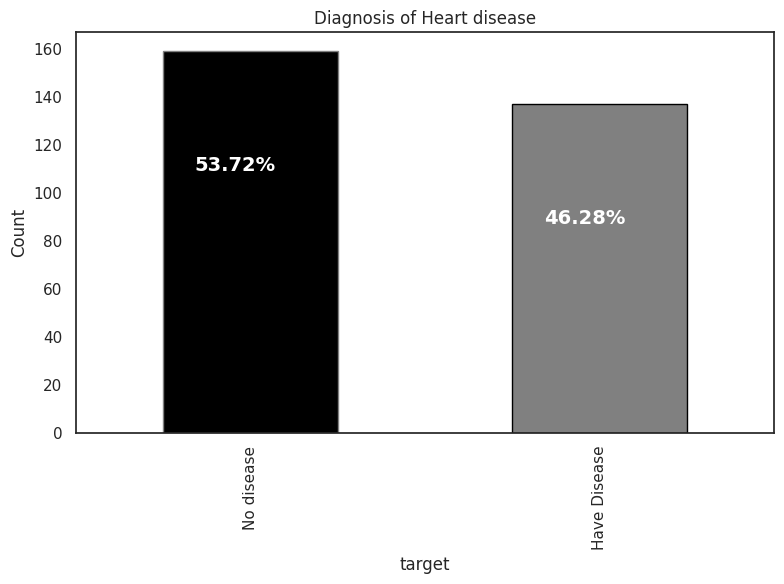

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
#my_data['sex'] = my_data.sex.replace({1: "Male", 0: "Female"})
Target_analysis = my_data.target.value_counts()
Target_analysis.plot.bar(title="Diagnosis of Heart disease", ylabel='Count', color = ['black','grey'], edgecolor = ['grey','black'], ax=ax)
totals = []
for i in ax.patches:
  totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
  ax.text(i.get_x()+.09, i.get_height()-50, str(round((i.get_height()/total)*100, 2))+'%', fontsize=14, color='white', weight = 'bold')
plt.tight_layout()

Text(0.5, 1.0, 'GENDER ANALYSIS BASED ON HAVING HEART DISEASE')

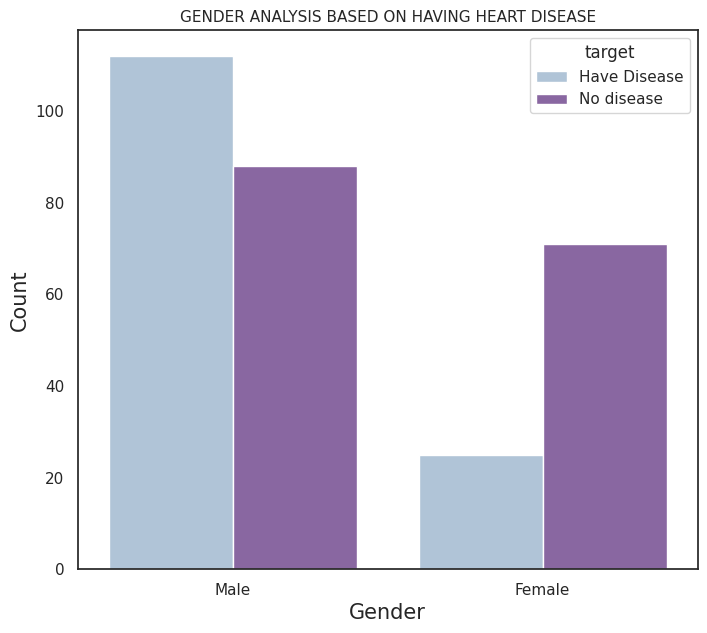

In [ ]:
fig, ax = plt.subplots(figsize=(8, 7))
p = sns.countplot(x="sex", data = my_data, hue='target', palette='BuPu', ax = ax)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title("GENDER ANALYSIS BASED ON HAVING HEART DISEASE", fontsize = 11)

In [ ]:
totals = []
for i in ax.patches:
  totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
  ax.text(i.get_x()+.05, i.get_height()-15, str(round((i.get_height()/total)*100, 2))+'%', fontsize=14, color='white', weight = 'bold')
plt.tight_layout()

<Figure size 1500x1000 with 0 Axes>

In [ ]:
gender = pd.crosstab(my_data['sex'], my_data['target'])
print(gender)

target  Have Disease  No disease
sex                             
Female            25          71
Male             112          88


Text(0.2, 140, 'Female : 0')

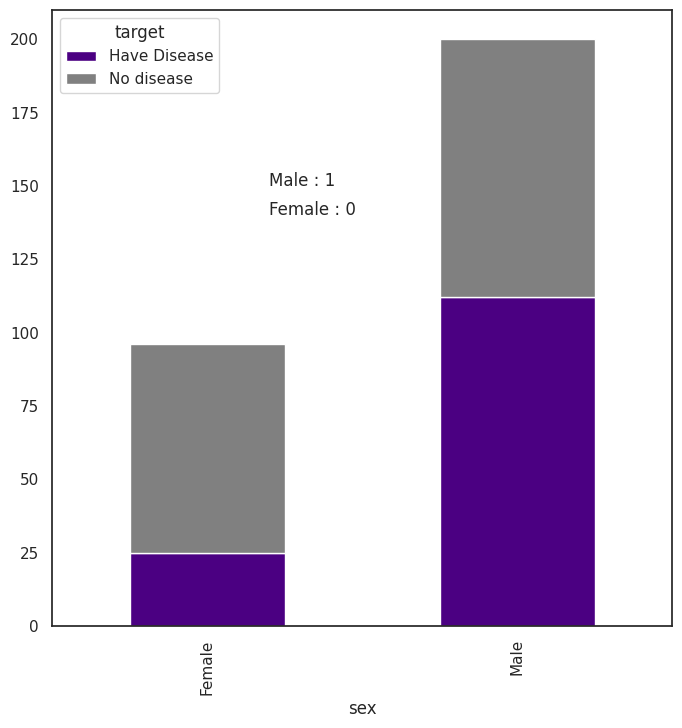

In [ ]:
gender.plot(kind = 'bar', stacked = True, color = ['indigo', 'grey'], figsize=(8,8), grid = False)
plt.text(0.2,150,'Male : 1')
plt.text(0.2,140,'Female : 0')

Text(0.5, 1.0, 'AGE ANALYSIS BASED ON HAVING HEART DISEASE')

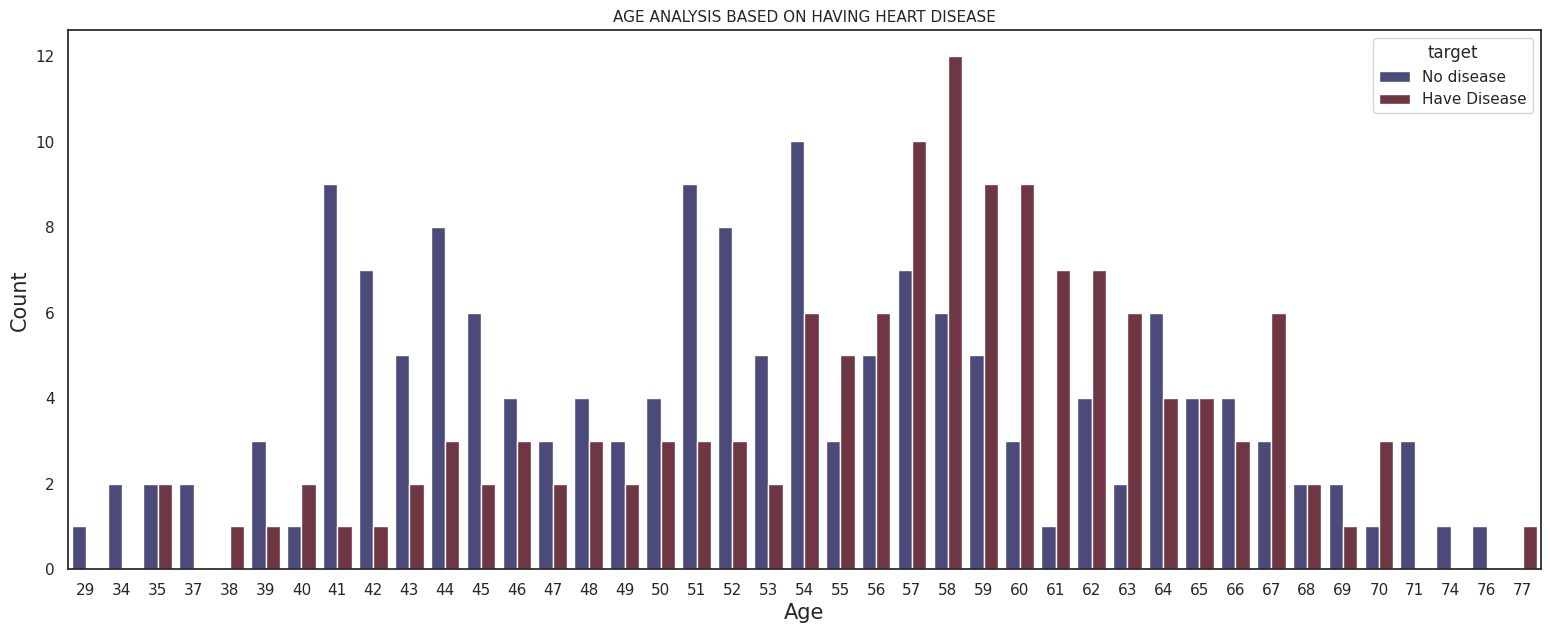

In [ ]:
fig, ax = plt.subplots(figsize=(19, 7))
p = sns.countplot(x="age", data = my_data, hue='target', palette='icefire', ax = ax)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title("AGE ANALYSIS BASED ON HAVING HEART DISEASE", fontsize = 11)

<ipython-input-39-ca128785d3f8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = my_data.age.value_counts()[:10].index,y = my_data.age.value_counts()[:10].values,palette = 'BuPu', ax =ax)


The minimum age in the dataset is : 29
The maximum age in the dataset is : 77
The mean of the age in the dataset is : 54.513513513513516


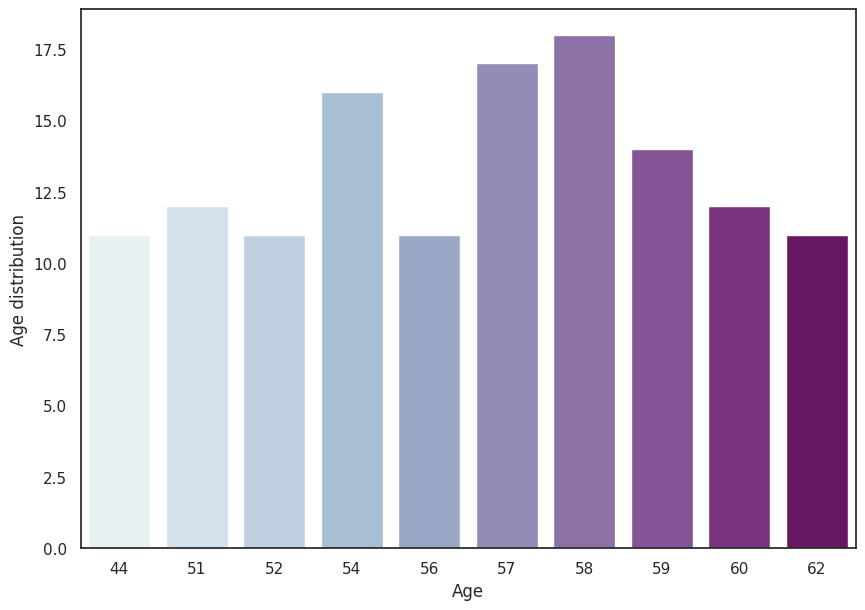

In [39]:
min_age = min(my_data['age'])
max_age = max(my_data['age'])
mean_of_age = my_data.age.mean()
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x = my_data.age.value_counts()[:10].index,y = my_data.age.value_counts()[:10].values,palette = 'BuPu', ax =ax)
plt.xlabel('Age')
plt.ylabel('Age distribution')
print("The minimum age in the dataset is :", min_age)
print("The maximum age in the dataset is :", max_age)
print("The mean of the age in the dataset is :", mean_of_age)

Text(0.5, 1.0, 'EXERCISE INDUCED ANGINA ANALYSIS BASED ON HAVING HEART DISEASE')

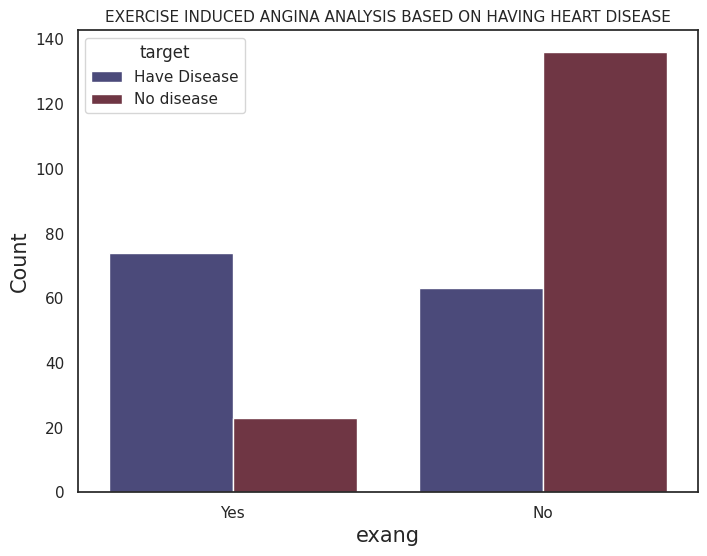

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))
p = sns.countplot(x="exang", data = my_data, hue='target', palette='icefire', ax = ax)
plt.xlabel('exang', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title("EXERCISE INDUCED ANGINA ANALYSIS BASED ON HAVING HEART DISEASE", fontsize = 11)

Text(0.5, 1.0, 'SLOPE ANALYSIS BASED ON HAVING HEART DISEASE')

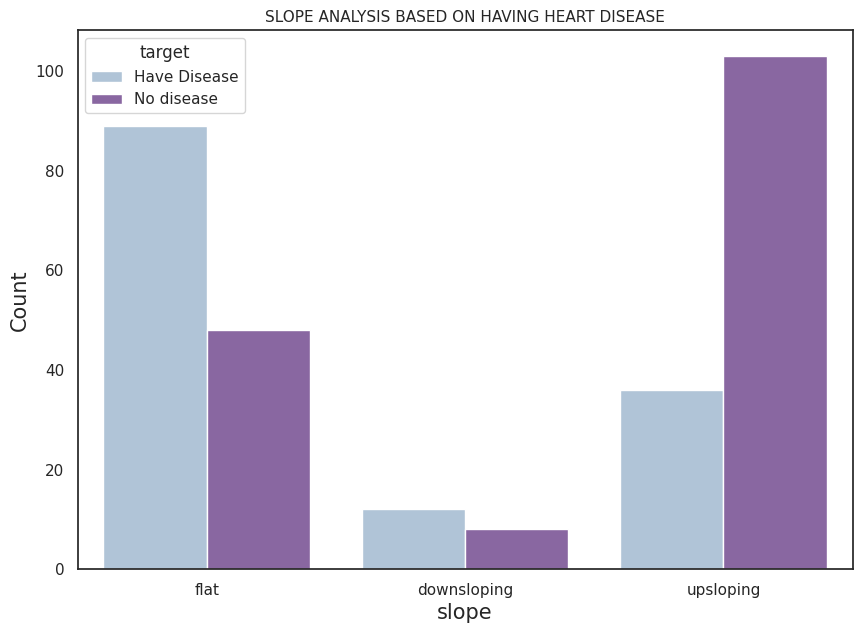

In [41]:
fig, ax = plt.subplots(figsize=(10, 7))
p = sns.countplot(x="slope", data = my_data, hue='target', palette='BuPu', ax = ax)
plt.xlabel('slope', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title("SLOPE ANALYSIS BASED ON HAVING HEART DISEASE", fontsize = 11)

Text(0.5, 1.0, 'OLD PEAK ANALYSIS BASED ON HAVING HEART DISEASE')

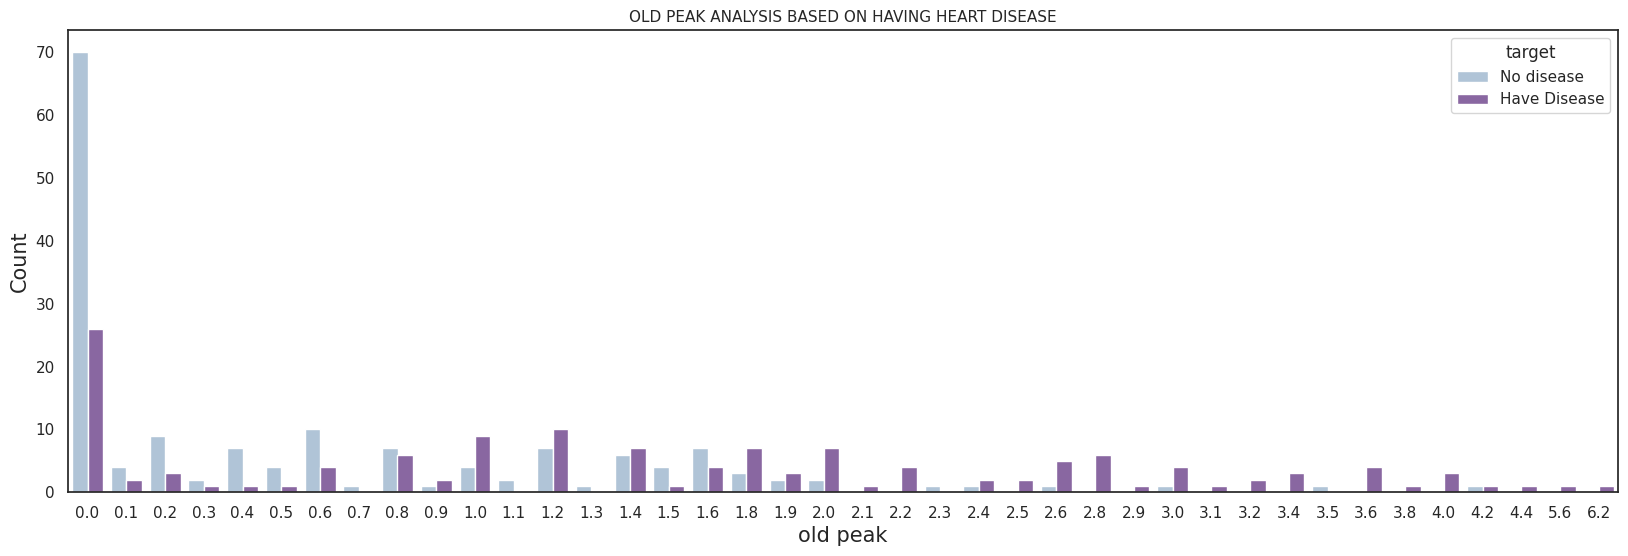

In [42]:
fig, ax = plt.subplots(figsize=(20, 6))
p = sns.countplot(x="oldpeak", data = my_data, hue='target', palette='BuPu', ax = ax)
plt.xlabel('old peak', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title("OLD PEAK ANALYSIS BASED ON HAVING HEART DISEASE", fontsize = 11)

Text(0.5, 1.0, 'CHEST PAIN ANALYSIS BASED ON HAVING HEART DISEASE')

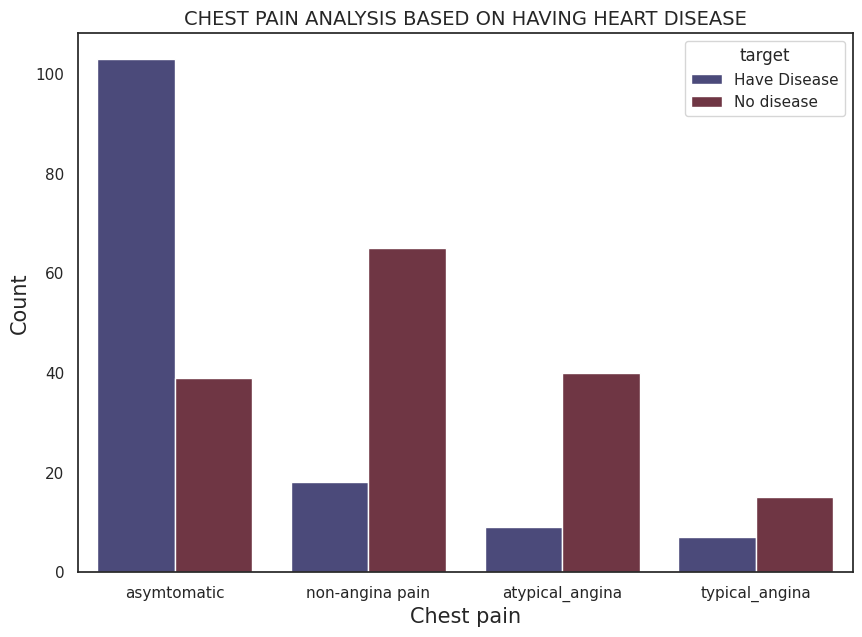

In [43]:
fig, ax = plt.subplots(figsize=(10, 7))
p = sns.countplot(x="cp", data = my_data, hue='target', palette='icefire', ax = ax)
plt.xlabel('Chest pain', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title("CHEST PAIN ANALYSIS BASED ON HAVING HEART DISEASE", fontsize = 14)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ca'}>]], dtype=object)

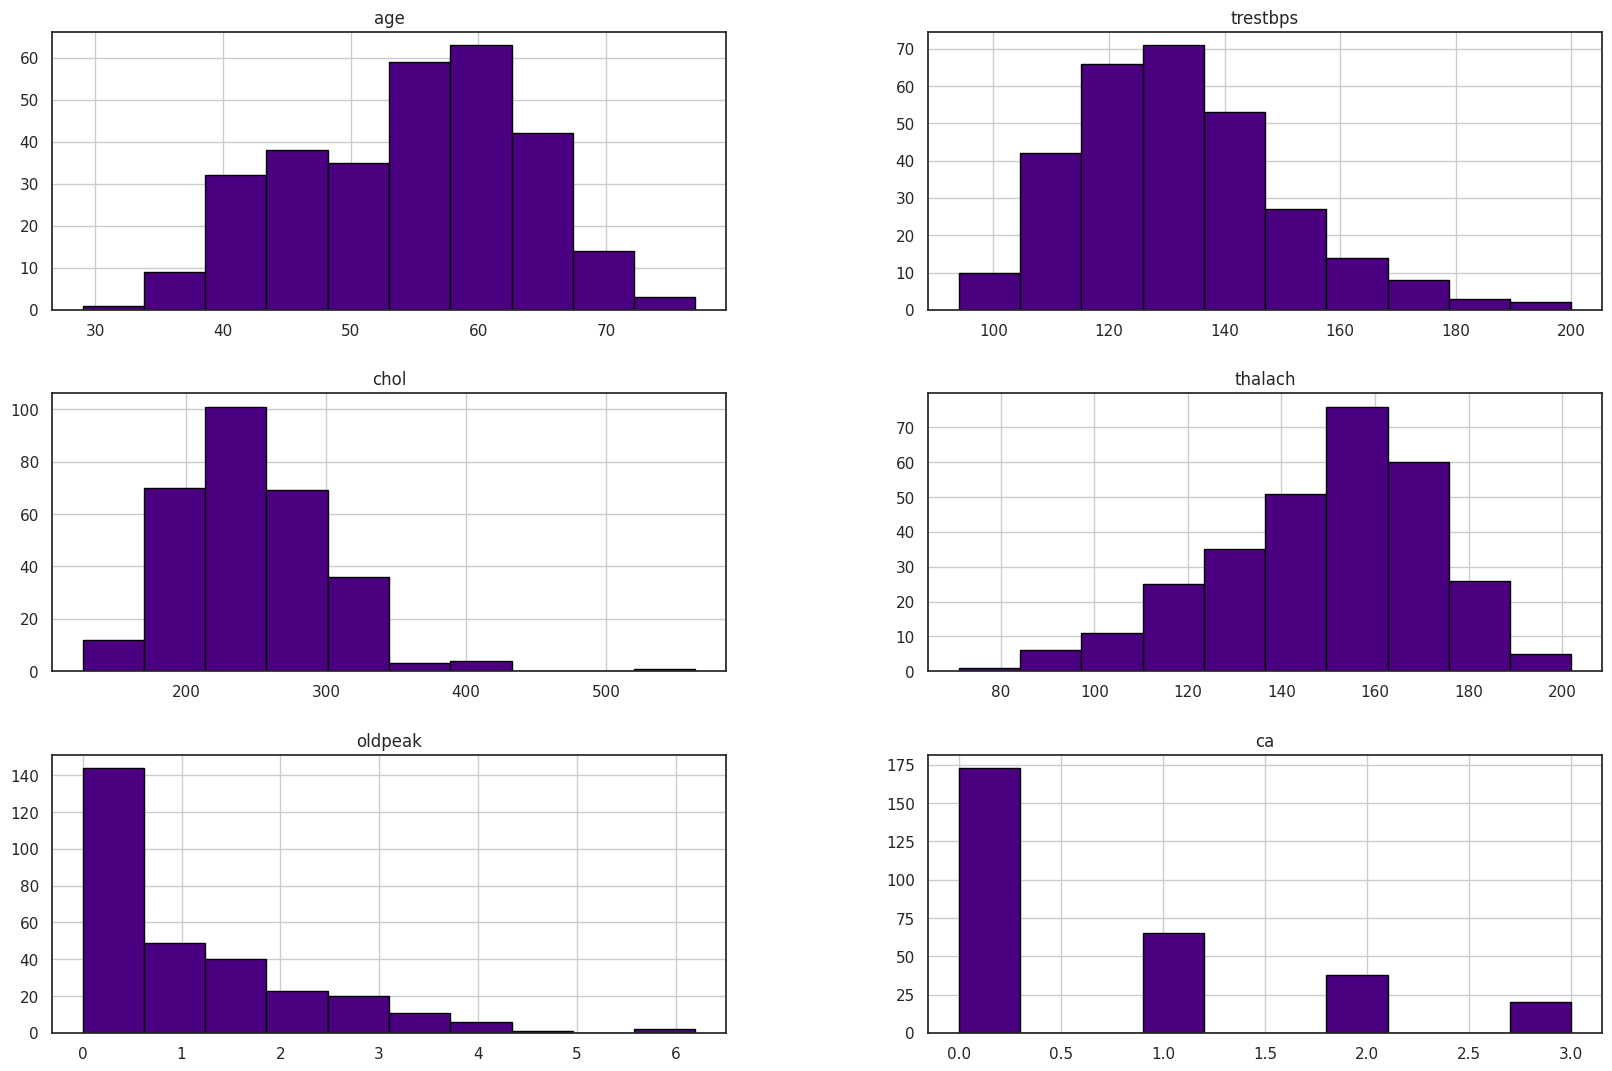

In [46]:
my_data.hist(edgecolor = "black", color = 'indigo', figsize=(20,13))

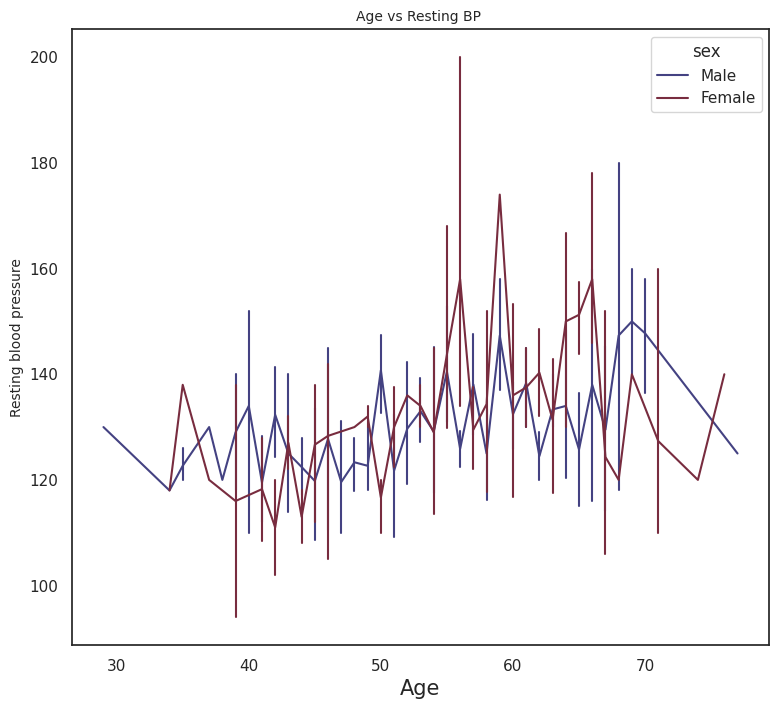

In [48]:
plt.figure(figsize=(9,8))
p = sns.lineplot(data=my_data, x='age', y='trestbps', err_style="bars", hue='sex', palette='icefire', legend='full')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Resting blood pressure', fontsize = 10)
plt.title("Age vs Resting BP ", fontsize = 10)
plt.show(p)

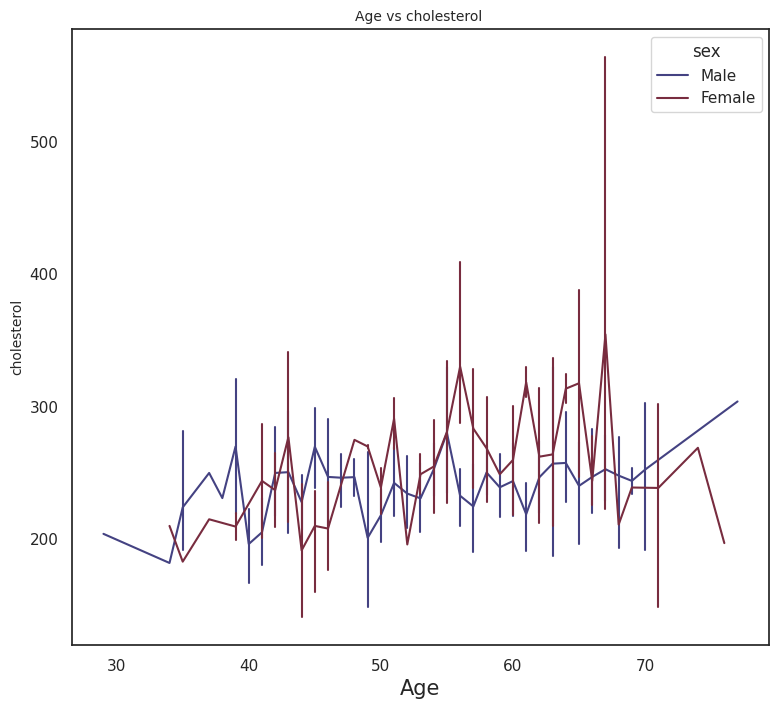

In [51]:
plt.figure(figsize=(9,8))
r = sns.lineplot(data=my_data, x='age', y='chol', err_style="bars", hue='sex', palette='icefire',legend='full')

plt.xlabel('Age', fontsize = 15)
plt.ylabel('cholesterol', fontsize = 10)
plt.title("Age vs cholesterol ", fontsize = 10)
plt.show(r)

Text(0.5, 1.0, 'Max Pulse vs Resting BP')

<Figure size 1000x400 with 0 Axes>

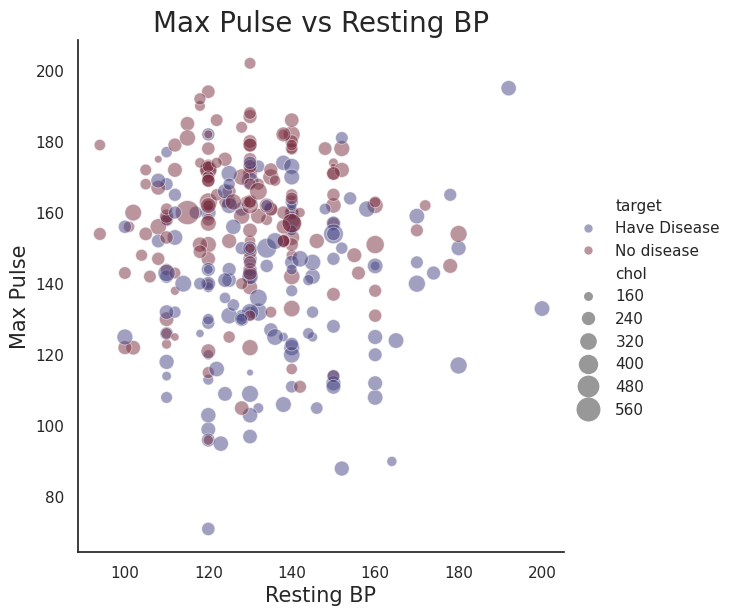

In [52]:
plt.figure(figsize=(10, 4))
sns.relplot(data = my_data, x='trestbps', y='thalach', hue='target', size='chol',sizes=(20, 300), alpha=.5, palette="icefire",height=6)
plt.xlabel("Resting BP", fontsize = 15)
plt.ylabel("Max Pulse", fontsize = 15)
plt.title("Max Pulse vs Resting BP", fontsize = 20)

<Axes: xlabel='trestbps', ylabel='age'>

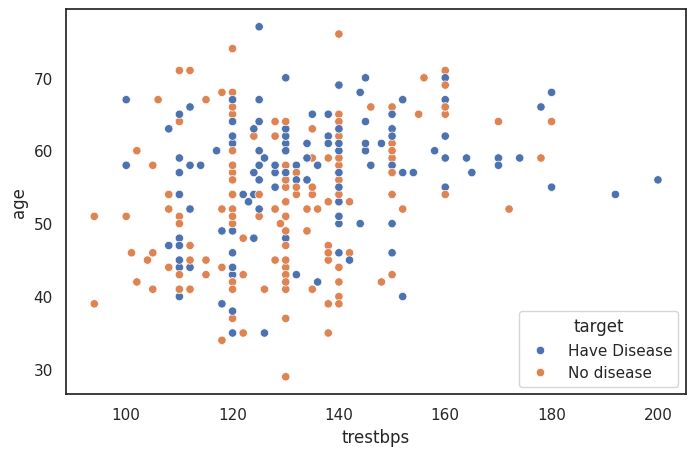

In [53]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(x='trestbps', y='age', hue='target', data = my_data , ax=ax)

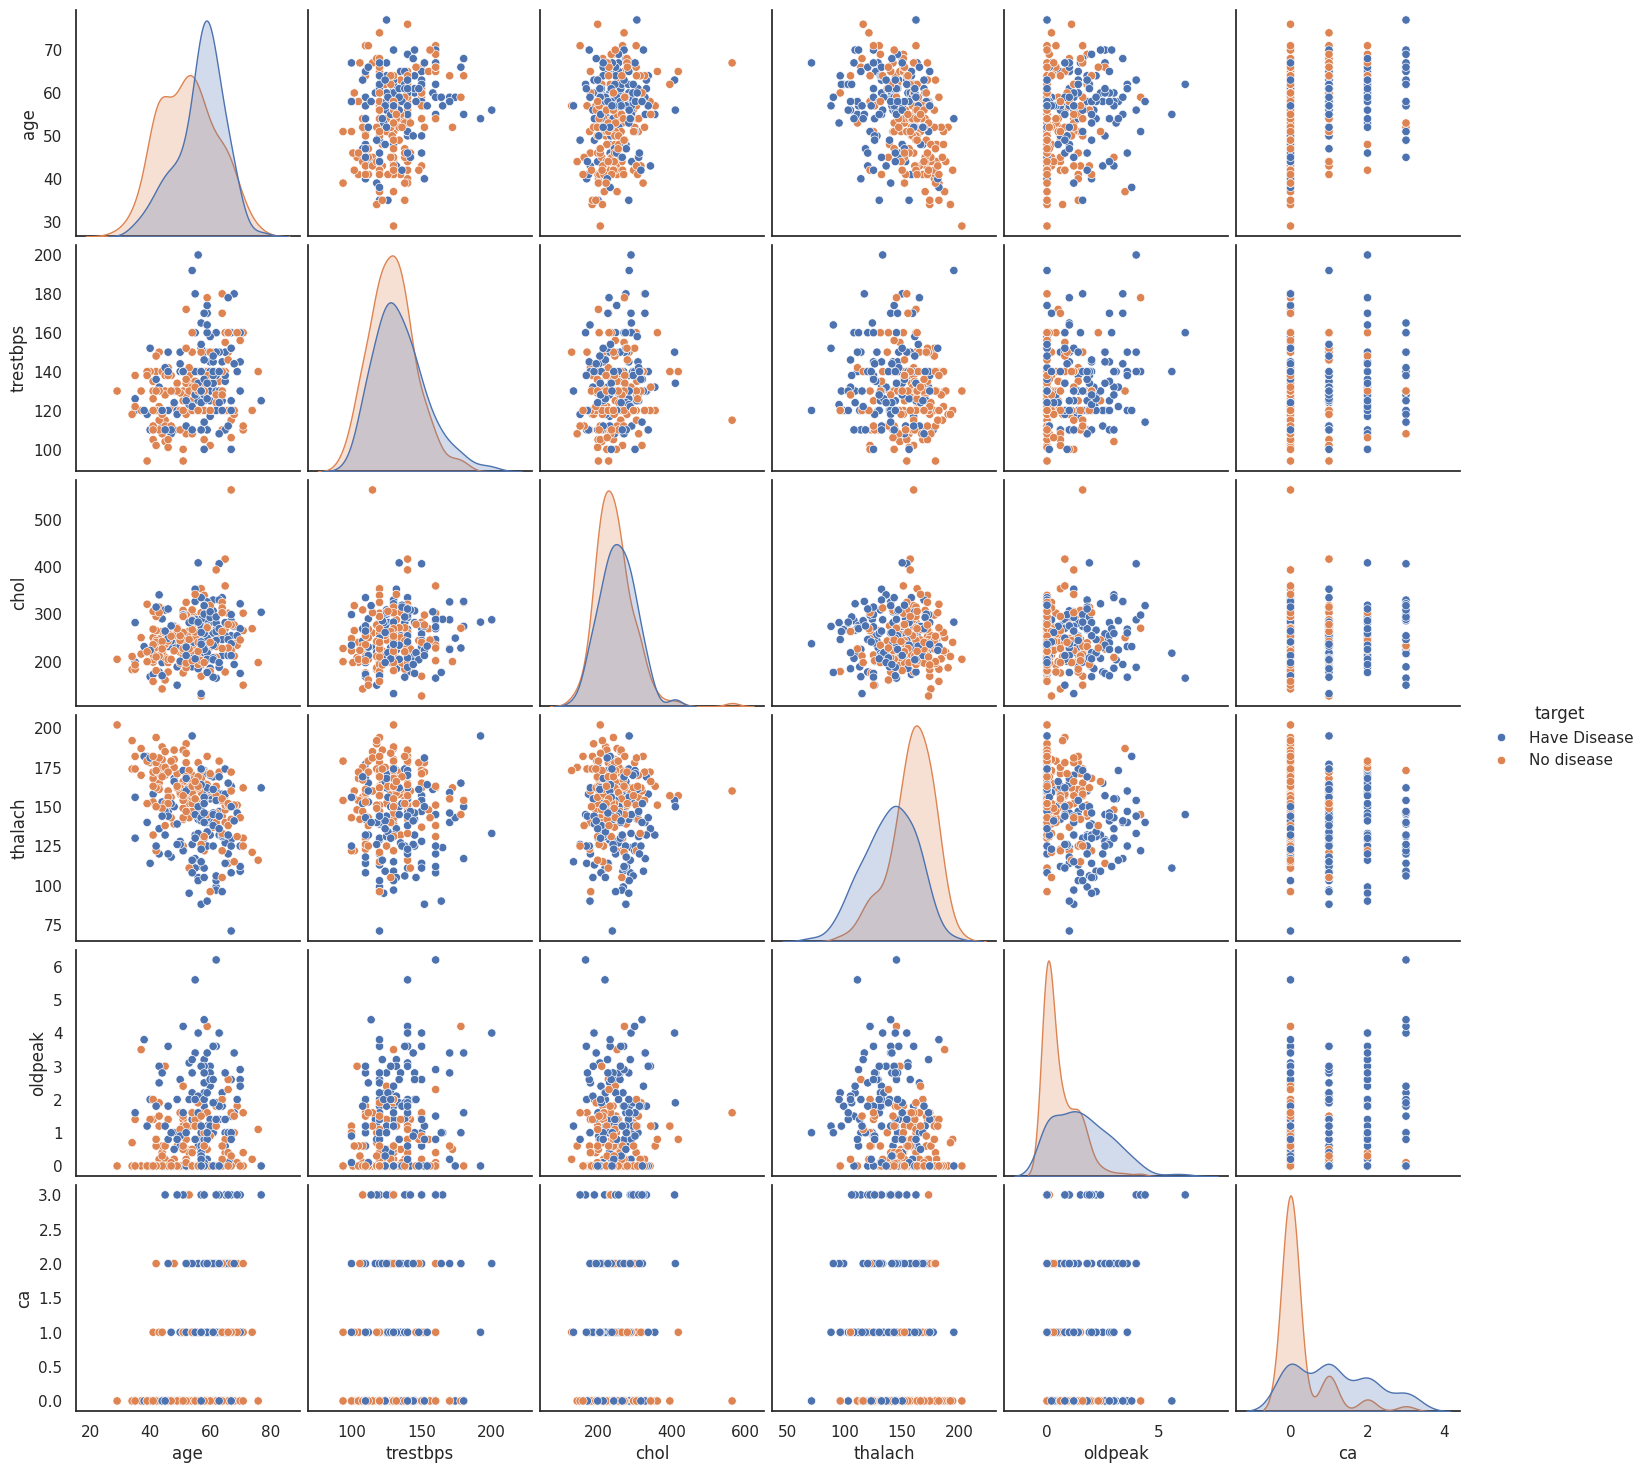

In [54]:
sns.pairplot(my_data, hue ='target')

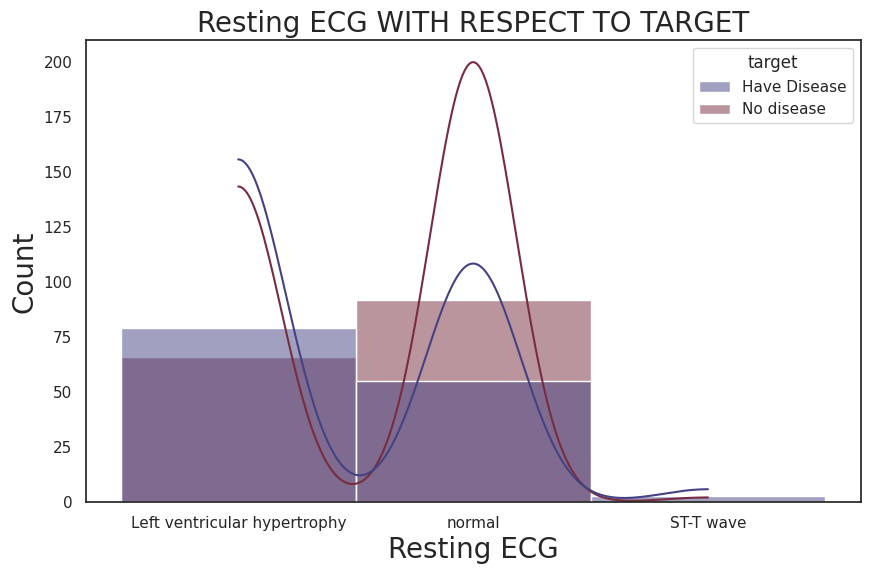

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data = my_data, x = 'restecg', kde = True, hue = 'target', palette='icefire')
plt.xlabel("Resting ECG", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Resting ECG WITH RESPECT TO TARGET", fontsize=20)
plt.show()

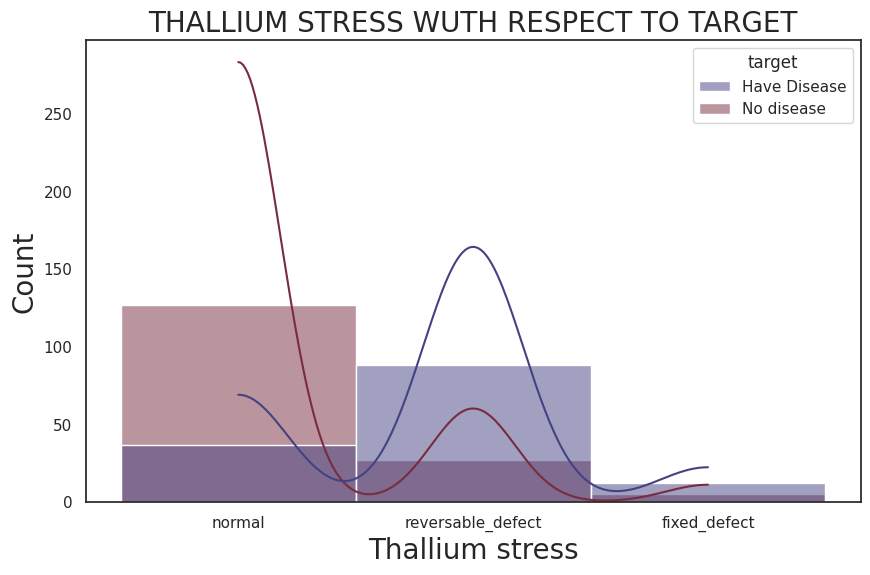

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(data = my_data, x = 'thal', kde = True, hue = 'target', palette='icefire')
plt.xlabel("Thallium stress", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("THALLIUM STRESS WUTH RESPECT TO TARGET", fontsize=20)
plt.show()

<Axes: xlabel='ca', ylabel='Count'>

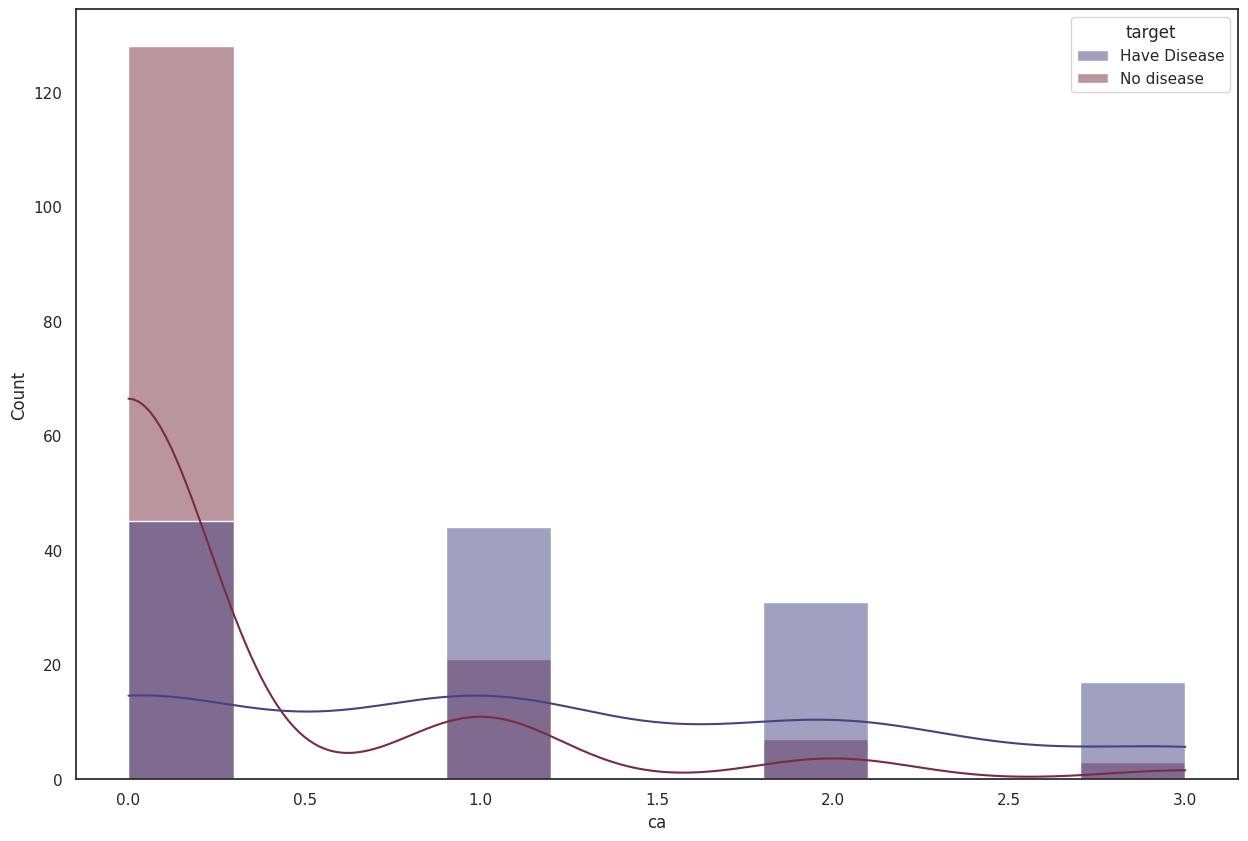

In [57]:
sns.histplot(data = my_data, x = 'ca', kde = True, hue = 'target', palette='icefire')

Text(1, 85, 'False: 0')

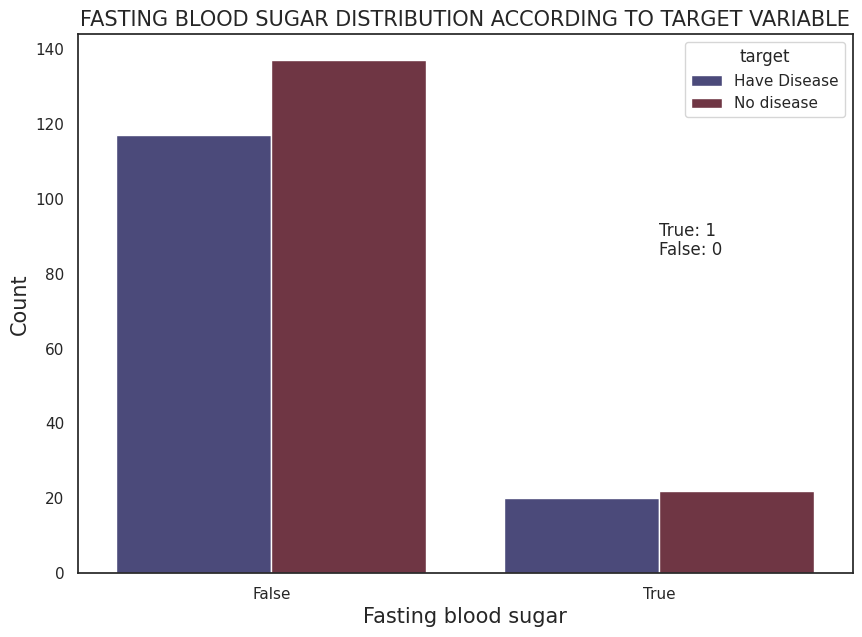

In [58]:
fig, ax = plt.subplots(figsize=(10, 7))
p = sns.countplot(x="fbs", data = my_data, hue='target', palette='icefire', ax = ax)
plt.xlabel('Fasting blood sugar', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title("FASTING BLOOD SUGAR DISTRIBUTION ACCORDING TO TARGET VARIABLE", fontsize = 15)
plt.text(1,90,'True: 1')
plt.text(1,85,'False: 0')

In [60]:
totals = []
for i in ax.patches:
  totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
  ax.text(i.get_x()+.05, i.get_height()-15, str(round((i.get_height()/total)*100, 2))+'%', fontsize=14, color='white', weight = 'bold')
plt.tight_layout()

<Figure size 1500x1000 with 0 Axes>

In [62]:
#DATA MODEL:
#Scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
my_data[columns_to_scale] = StandardScaler.fit_transform(my_data[columns_to_scale])

<ipython-input-62-d1fdbf9f773d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data[columns_to_scale] = StandardScaler.fit_transform(my_data[columns_to_scale])


In [63]:
X= my_data.drop(['target'], axis=1)
y= my_data['target']

In [64]:
#To split data
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=40)

In [65]:
#We need to check the size of the training and testing dataset
print('X_train :', X_train.size)
print('X_test :',X_test.size)
print('y_train :', y_train.size)
print('y_test :', y_test.size)

X_train : 2301
X_test : 1547
y_train : 177
y_test : 119


In [66]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [71]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

lr=LogisticRegression()

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through columns of X_train and X_test and transform non-numerical columns
for column in X_train.columns:
    if X_train[column].dtype == type(object):  # Check if the column is of object type (likely string)
        # Fit the encoder to the column in the training data and transform it
        X_train[column] = le.fit_transform(X_train[column])
        # Transform the column in the testing data using the fitted encoder
        X_test[column] = le.transform(X_test[column])

Logistic_model = lr.fit(X_train,y_train)
prediction = Logistic_model.predict(X_test)

[[41  9]
 [ 4 65]]


<Axes: >

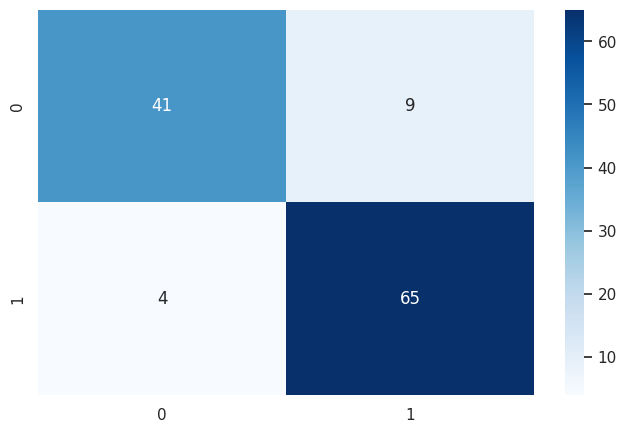

In [72]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
print(cm)
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(cm, annot=True,cmap='Blues', ax = ax)

In [73]:
TruePositive = cm[0][0]
TrueNegative = cm[1][1]
FalseNegative = cm[1][0]
FalsePositive =cm[0][1]
print('Testing Accuracy:',(TruePositive+TrueNegative)/(TruePositive+TrueNegative+FalseNegative+FalsePositive))

Testing Accuracy: 0.8907563025210085


In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8907563025210085

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

Have Disease       0.91      0.82      0.86        50
  No disease       0.88      0.94      0.91        69

    accuracy                           0.89       119
   macro avg       0.89      0.88      0.89       119
weighted avg       0.89      0.89      0.89       119



In [76]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [77]:
KNN = KNeighborsClassifier()
model_2 = KNN.fit(X_train, y_train)
prediction_2 = model_2.predict(X_test)
cm_2 = confusion_matrix(y_test, prediction_2)
print(cm_2)

[[36 14]
 [ 9 60]]


In [78]:
print('Logistic Regression :', accuracy_score(y_test, prediction))
print('KNN :', accuracy_score(y_test, prediction_2))

Logistic Regression : 0.8907563025210085
KNN : 0.8067226890756303


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

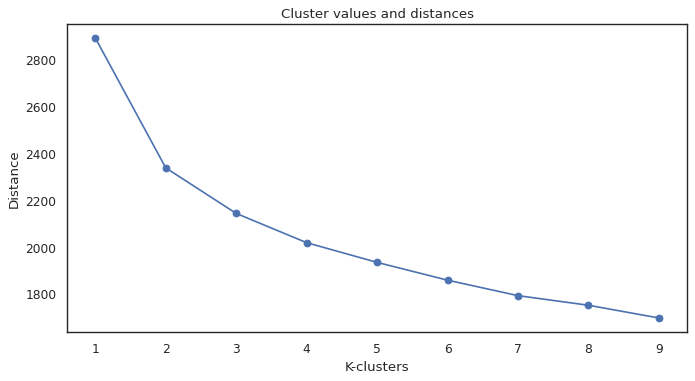

[[-9.21206531e-01 -4.94467625e-01 -3.14547606e-01  6.46227056e-01
  -4.62885769e-01  1.98198198e-01  2.79279279e-01  7.20720721e-01
   2.79279279e-01  2.79279279e-01  3.69369369e-01  7.20720721e-02
   9.27927928e-01  7.20720721e-02  3.60360360e-01 -5.20417043e-18
   6.39639640e-01  8.46846847e-01  1.53153153e-01  5.40540541e-02
   2.79279279e-01  6.66666667e-01  1.80180180e-02  7.29729730e-01
   2.52252252e-01  1.62162162e-01  8.37837838e-01]
 [ 3.75455219e-01  2.19375588e-01  8.93044883e-02 -8.67878273e-01
   9.17111781e-01  1.39583333e+00  1.87500000e-01  8.12500000e-01
   8.22916667e-01  2.08333333e-02  1.35416667e-01  2.08333333e-02
   8.33333333e-01  1.66666667e-01  5.83333333e-01  3.12500000e-02
   3.85416667e-01  3.43750000e-01  6.56250000e-01  1.25000000e-01
   7.81250000e-01  9.37500000e-02  1.25000000e-01  1.97916667e-01
   6.77083333e-01  9.47916667e-01  5.20833333e-02]
 [ 7.43935101e-01  3.80065730e-01  2.95972510e-01  1.30169786e-01
  -4.11937198e-01  5.05617978e-01  5.280

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [84]:
#CLUSTERING
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd # Import pandas for data manipulation

distances = []

# Assuming 'my_data' is your DataFrame
# Identify categorical columns
categorical_cols = my_data.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical features
my_data_encoded = pd.get_dummies(my_data, columns=categorical_cols)

K = range(1,10)
for k in K:
  ClusterInfo = kmeanmodel = KMeans(n_clusters=k).fit(my_data_encoded) # Use the encoded data for clustering
  distances.append(ClusterInfo.inertia_)

plt.figure(figsize=(10, 5), dpi=80)
plt.plot(K,distances, 'bo-')
plt.xlabel('K-clusters')
plt.ylabel('Distance')
plt.title('Cluster values and distances')
plt.show()

# Use the encoded data for fitting KMeans
kmeans = KMeans(n_clusters=3).fit(my_data_encoded)
centroids = kmeans.cluster_centers_
print(centroids)

Text(0, 0.5, 'Maximum heart rate')

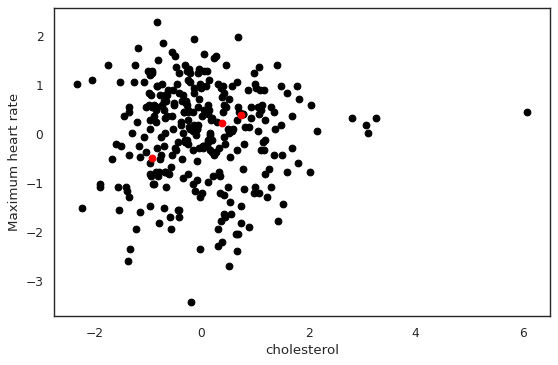

In [85]:
#chol : Cholestrol and thalach : maximum heart rate acheived
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(my_data['chol'], my_data['thalach'], c='black')
plt.scatter(centroids[:,0], centroids[:,1], c='red')
plt.xlabel('cholesterol')
plt.ylabel('Maximum heart rate')

In [86]:
#NLP ANALYSIS
data_for_NLP_analysis = pd.DataFrame(my_data)
print(data_for_NLP_analysis)

          age     sex               cp  trestbps      chol    fbs  \
0    1.381810    Male      asymtomatic  1.597628  0.742464  False   
1    1.381810    Male      asymtomatic -0.656413 -0.353882  False   
2   -1.938123    Male  non-angina pain -0.092903  0.050035  False   
3   -1.495465  Female  atypical_angina -0.092903 -0.834736  False   
4    0.164501    Male  atypical_angina -0.656413 -0.219243  False   
..        ...     ...              ...       ...       ...    ...   
296  0.275166  Female      asymtomatic  0.470607 -0.123073  False   
297 -1.052807    Male   typical_angina -1.219924  0.319313  False   
298  1.492474    Male      asymtomatic  0.696011 -1.046312   True   
299  0.275166    Male      asymtomatic -0.092903 -2.238829  False   
300  0.275166  Female  atypical_angina -0.092903 -0.219243  False   

                          restecg   thalach exang   oldpeak        slope  ca  \
0    Left ventricular hypertrophy -1.813215   Yes  0.385480         flat   3   
1    Left v

In [89]:
data_for_NLP_analysis['target'] = data_for_NLP_analysis.target.replace({1: "Disease", 0: "No_disease"})
data_for_NLP_analysis['sex'] = data_for_NLP_analysis.sex.replace({1: "Male", 0: "Female"})
data_for_NLP_analysis['cp'] = data_for_NLP_analysis.cp.replace({1: "typical_angina",2: "atypical_angina", 3:"non-anginal pain", 4: "asymtomatic"})
data_for_NLP_analysis['exang'] = data_for_NLP_analysis.exang.replace({1: "Yes", 0: "No"})
data_for_NLP_analysis['fbs'] = data_for_NLP_analysis.fbs.replace({1: "True", 0: "False"})
data_for_NLP_analysis['slope'] = data_for_NLP_analysis.slope.replace({1: "upsloping", 2: "flat",3:"downsloping"})
data_for_NLP_analysis['thal'] = data_for_NLP_analysis.thal.replace({6: "fixed_defect", 7: "reversable_defect", 3:"normal"})
data_for_NLP_analysis = data_for_NLP_analysis.drop(['age','restecg','thalach', 'oldpeak', 'ca' , 'trestbps','chol','exang','fbs','slope','thal' ], axis=1)

In [93]:
# import needed libraries
# needed for directory access
import os
import nltk

textfile = data_for_NLP_analysis.to_csv(index=False)
print(textfile)

sex,cp,target
Male,asymtomatic,Have Disease
Male,asymtomatic,Have Disease
Male,non-angina pain,No disease
Female,atypical_angina,No disease
Male,atypical_angina,No disease
Female,asymtomatic,Have Disease
Female,asymtomatic,No disease
Male,asymtomatic,Have Disease
Male,asymtomatic,Have Disease
Male,asymtomatic,No disease
Female,atypical_angina,No disease
Male,non-angina pain,Have Disease
Male,atypical_angina,No disease
Male,non-angina pain,No disease
Male,non-angina pain,No disease
Male,atypical_angina,Have Disease
Male,asymtomatic,No disease
Female,non-angina pain,No disease
Male,atypical_angina,No disease
Male,typical_angina,No disease
Female,typical_angina,No disease
Male,atypical_angina,Have Disease
Male,non-angina pain,Have Disease
Male,asymtomatic,Have Disease
Female,non-angina pain,No disease
Female,non-angina pain,No disease
Female,typical_angina,No disease
Male,asymtomatic,No disease
Male,asymtomatic,Have Disease
Female,typical_angina,No disease
Male,asymtomatic,Have Disease
Ma

In [95]:
# import needed libraries
# needed for directory access
import os
import nltk

# Download the Punkt sentence tokenizer
nltk.download('punkt')

textfile = data_for_NLP_analysis.to_csv(index=False)
print(textfile)

# Assuming 'text' is the column in your DataFrame containing the text data
tokens = nltk.word_tokenize(' '.join(data_for_NLP_analysis['cp'])) # Tokenize the text data
word_frequency_allwords = nltk.FreqDist(tokens)
print(word_frequency_allwords.tabulate(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


sex,cp,target
Male,asymtomatic,Have Disease
Male,asymtomatic,Have Disease
Male,non-angina pain,No disease
Female,atypical_angina,No disease
Male,atypical_angina,No disease
Female,asymtomatic,Have Disease
Female,asymtomatic,No disease
Male,asymtomatic,Have Disease
Male,asymtomatic,Have Disease
Male,asymtomatic,No disease
Female,atypical_angina,No disease
Male,non-angina pain,Have Disease
Male,atypical_angina,No disease
Male,non-angina pain,No disease
Male,non-angina pain,No disease
Male,atypical_angina,Have Disease
Male,asymtomatic,No disease
Female,non-angina pain,No disease
Male,atypical_angina,No disease
Male,typical_angina,No disease
Female,typical_angina,No disease
Male,atypical_angina,Have Disease
Male,non-angina pain,Have Disease
Male,asymtomatic,Have Disease
Female,non-angina pain,No disease
Female,non-angina pain,No disease
Female,typical_angina,No disease
Male,asymtomatic,No disease
Male,asymtomatic,Have Disease
Female,typical_angina,No disease
Male,asymtomatic,Have Disease
Ma

    asymtomatic      non-angina            pain atypical_angina  typical_angina 
            142              83              83              49              22 
None


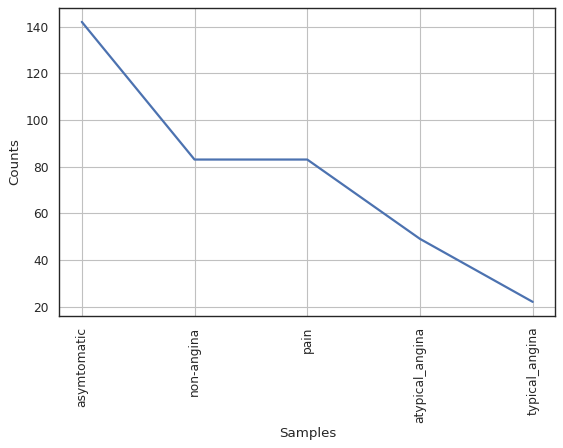

<Axes: xlabel='Samples', ylabel='Counts'>

In [96]:
word_frequency_allwords['female']
word_frequency_allwords['male']
plt.figure(figsize=(8, 5), dpi=80)
print(word_frequency_allwords.tabulate(10))
word_frequency_allwords.plot(10)